In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
from sklearn import datasets

<h4> Zadanie1: Czy jest możliwe żeby dwie pierwsze komponenty objaśniały 100% wariancji danych 50D? Jeśli nie - udowodnij, jeśli tak - podaj przykład.

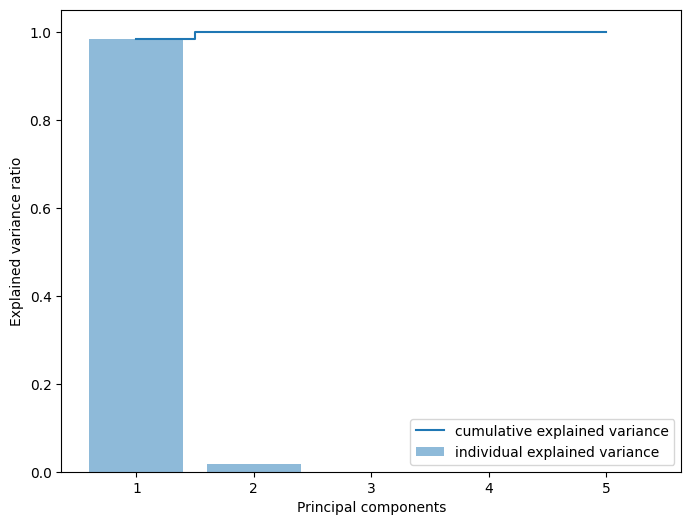

In [5]:
data = [[1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
        [0, 1, 1, 0, 1],
        [-1, -2, -3, -4, -5],
        [0, 1, 1, 0, 1],
        [1, 2, 3, 4, 5],
       ]
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(data)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp_cum = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar( range(1, 6), var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 6), var_exp_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

<h4> Zadanie2: Rozważ dane $iris$. Dokonaj standaryzacji a następnie przeprowadź algorytm PCA. Która z cech wydaje się najistoniejsza? Ile komponentów wystarczająco dobrze opisuje te dane? Skomentuj otrzymane wyniki.

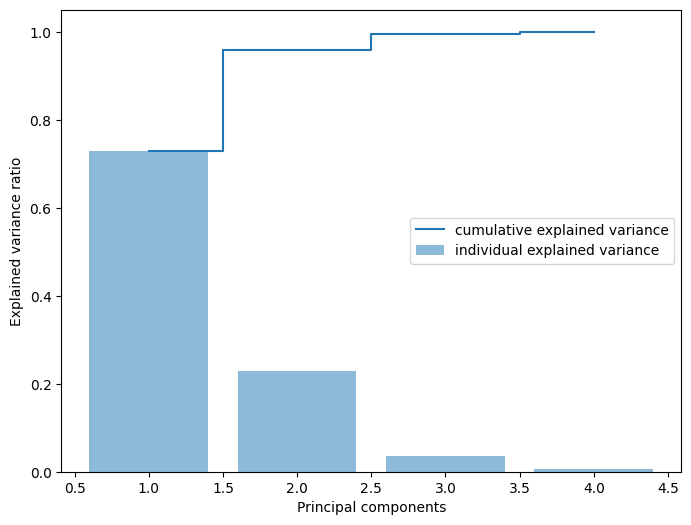

In [8]:
data = datasets.load_iris()
X_train_std = StandardScaler().fit_transform(data.data)
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp_cum = np.cumsum(var_exp) # stepping-sum
plt.figure(figsize=(8,6))
plt.bar( range(1, 5), var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 5), var_exp_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [9]:
print(f"dwie pierwsze komponenty daja {sum(pca.explained_variance_ratio_[:2]) * 100} %, a komenatrz z notebooka wskazuje, że 80 % jest wyystarczająco")

dwie pierwsze komponenty daja 95.81320720000164 %, a komenatrz z notebooka wskazuje, że 80 % jest wyystarczająco


In [13]:
pd.DataFrame(data=pca.components_, columns=data.feature_names, index = ['komponenta 1', 'komponenta 2', 'komponenta 3', 'komponenta 4'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
komponenta 1,0.521066,-0.269347,0.580413,0.564857
komponenta 2,0.377418,0.923296,0.024492,0.066942
komponenta 3,-0.719566,0.244382,0.142126,0.634273
komponenta 4,-0.261286,0.123510,0.801449,-0.523597


Dla pierwszej komponenty sep len, pet len i pet wid po równo mają wkład, dla drugiej komponenty zdecydowanie największy ma sep wid

<h4> Zadanie3: Rozważ jeszcze raz dane dotyczące twarzy różnych osób (fetch_lw_people) rozważane podczas ćwiczenia z SVM. Zastosuj podobnie jak wtedy PCA ze 150 komponentnami. Jaki procent wariancji opisują te komponenty? Narsuj kilka początkowych komponentów (wektory własne); oczywiście podobnie jak obrazy są to wektory $64\cdot47$ wymiarowe - przed narysowaniem należy jeszcze zastosować metodę reshape. Zastanów się nad ich interpretacją.

In [19]:
data = datasets.fetch_lfw_people()
data = datasets.fetch_lfw_people(min_faces_per_person = 60)
pca.fit_transform(data.data)
print(f"150 komponentów opisuje {sum(pca.explained_variance_ratio_) * 100} % wariancji")

150 komponentów opisuje 92.16571621072944 % wariancji


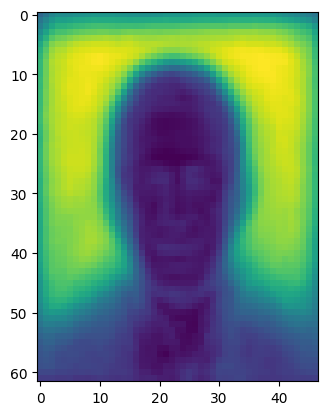

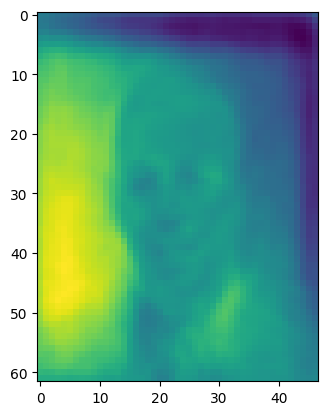

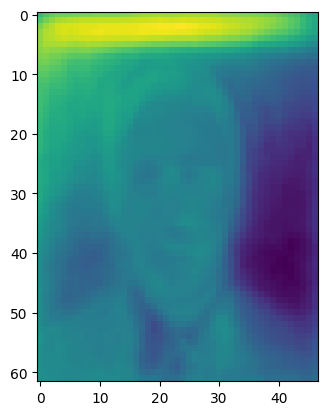

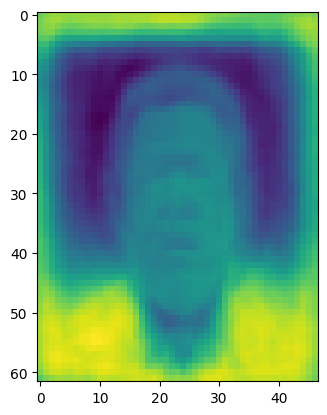

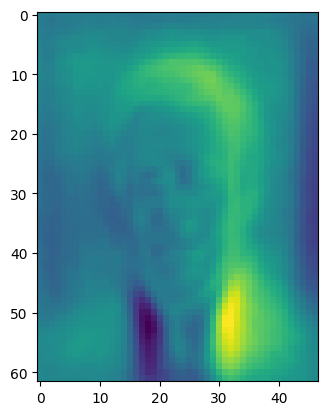

In [20]:
for i in range(5):
    plt.imshow(pca.components_[i].reshape(62, 47))
    plt.show()
    

<h4> Zadanie4: Zauważ, że wykresy te różnią się zakresem wartości - czy to zrozumiałe?

Ponieważ przez składanie i rozkładanie tych danych, nie jesteśmy w stanie odwtorzyć współćzynników funkcji